In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import missingno as msno
from scipy import stats
import statistics
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, precision_score, recall_score,  classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
np.random.seed(123)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
df = pd.read_csv(r"/content/COVID-19_Case_Surveillance_Public_Use_Data.csv")

In [3]:
df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [4]:
df.tail()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
9008,2020/11/17,2020/11/11,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Multiple/Other, Non-Hispanic",Missing,Missing,Missing,Missing
9009,2020/11/14,2020/11/11,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Multiple/Other, Non-Hispanic",Missing,Missing,Missing,Missing
9010,2020/11/17,2020/11/11,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Multiple/Other, Non-Hispanic",Missing,Missing,Missing,Missing
9011,2020/11/14,2020/11/11,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Multiple/Other, Non-Hispanic",No,No,No,Missing
9012,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
       'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn',
       'death_yn', 'medcond_yn'],
      dtype='object')

Column Description 1.cdc_report_dt - earlier clinical dates related to illness or specimen collection

2.pos_spec_dt - date at which column name was submitted to the database

3.onset_dt - date of the symptoms shown

4.sex - gender of a person

5.age_group - various age groups of a person

6.Race and ethnicity - social group or clutural tradition of a person

7.hosp_yn - status of admission in hospitial

8.icu_yn - status of admission in ICU

9.death_yn - did the patient die as a result of this illness

10.medcond_yn - status of pre-existing medical condition

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9013 entries, 0 to 9012
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   cdc_report_dt                  9013 non-null   object
 1   pos_spec_dt                    9012 non-null   object
 2   onset_dt                       4245 non-null   object
 3   current_status                 9012 non-null   object
 4   sex                            9012 non-null   object
 5   age_group                      9012 non-null   object
 6   Race and ethnicity (combined)  9012 non-null   object
 7   hosp_yn                        9012 non-null   object
 8   icu_yn                         9012 non-null   object
 9   death_yn                       9012 non-null   object
 10  medcond_yn                     9012 non-null   object
dtypes: object(11)
memory usage: 774.7+ KB


In [7]:
df.isnull()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9008,False,False,True,False,False,False,False,False,False,False,False
9009,False,False,True,False,False,False,False,False,False,False,False
9010,False,False,True,False,False,False,False,False,False,False,False
9011,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#Changing object to datetime 
df['cdc_report_dt']=pd.to_datetime(df.cdc_report_dt,errors='coerce')
df['onset_dt']=pd.to_datetime(df.onset_dt)
df['pos_spec_dt']=pd.to_datetime(df.pos_spec_dt)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9013 entries, 0 to 9012
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   cdc_report_dt                  9012 non-null   datetime64[ns]
 1   pos_spec_dt                    9012 non-null   datetime64[ns]
 2   onset_dt                       4245 non-null   datetime64[ns]
 3   current_status                 9012 non-null   object        
 4   sex                            9012 non-null   object        
 5   age_group                      9012 non-null   object        
 6   Race and ethnicity (combined)  9012 non-null   object        
 7   hosp_yn                        9012 non-null   object        
 8   icu_yn                         9012 non-null   object        
 9   death_yn                       9012 non-null   object        
 10  medcond_yn                     9012 non-null   object        
dtypes: datetime64[ns]

# Checking missing values

In [10]:
df.isnull().sum()

cdc_report_dt                       1
pos_spec_dt                         1
onset_dt                         4768
current_status                      1
sex                                 1
age_group                           1
Race and ethnicity (combined)       1
hosp_yn                             1
icu_yn                              1
death_yn                            1
medcond_yn                          1
dtype: int64

# Feature Engineering


In [11]:
df['symptomatic_yn'] = np.where(df.onset_dt.isnull(), 'No', 'Yes')
df[0:10][['symptomatic_yn','onset_dt']]

,symptomatic_yn,onset_dt
0,No,NaT
1,Yes,2020-11-10
2,Yes,2020-11-09
3,No,NaT
4,Yes,2020-11-10
5,Yes,2020-11-08
6,No,NaT
7,No,NaT
8,No,NaT
9,No,NaT


In [12]:
df['tested_yn'] = np.where(df[['pos_spec_dt']].isnull(), 'No', 'Yes')
df[:][['tested_yn','pos_spec_dt']]

,tested_yn,pos_spec_dt
0,Yes,2020-11-10
1,Yes,2020-11-10
2,Yes,2020-11-10
3,Yes,2020-11-10
4,Yes,2020-11-10
...,...,...
9008,Yes,2020-11-11
9009,Yes,2020-11-11
9010,Yes,2020-11-11
9011,Yes,2020-11-11


In [13]:
print(df.age_group.unique())

['10 - 19 Years' nan]


In [14]:
change={
        '0 - 9 Years': 10,
        '10 - 19 Years': 20,
        '20 - 29 Years': 30,
        '30 - 39 Years': 40,
        '40 - 49 Years': 50,
        '50 - 59 Years': 60,
        '60 - 69 Years': 70,
        '70 - 79 Years': 80,
        '80+ Years': 90
        }

df['decades_of_age(less_than)'] = df['age_group'].map(change)
df[55:65][['decades_of_age(less_than)','age_group']]

,decades_of_age(less_than),age_group
55,20.0,10 - 19 Years
56,20.0,10 - 19 Years
57,20.0,10 - 19 Years
58,20.0,10 - 19 Years
59,20.0,10 - 19 Years
60,20.0,10 - 19 Years
61,20.0,10 - 19 Years
62,20.0,10 - 19 Years
63,20.0,10 - 19 Years
64,20.0,10 - 19 Years


In [18]:
#Extracting month 
df['month_cdc']=df['cdc_report_dt'].dt.month
#Extracting week
df['week_cdc']=df['cdc_report_dt'].dt.week

In [20]:
df.isnull().sum()

cdc_report_dt                    1
pos_spec_dt                      1
onset_dt                         1
current_status                   1
sex                              1
age_group                        1
Race and ethnicity (combined)    1
hosp_yn                          1
icu_yn                           1
death_yn                         1
medcond_yn                       1
symptomatic_yn                   0
tested_yn                        0
decades_of_age(less_than)        1
month_cdc                        1
week_cdc                         1
dtype: int64

# Dropping na values 

In [21]:
df = df.dropna(subset=['decades_of_age(less_than)'], how='any')
df.reset_index(drop=True, inplace=True)
df.shape

(9012, 16)

In [22]:
df = df.dropna(subset=['death_yn'], how='any')
df.reset_index(drop=True, inplace=True)
df.shape

(9012, 16)

In [23]:
df = df.dropna(subset=['medcond_yn'], how='any')
df.reset_index(drop=True, inplace=True)
df.shape

(9012, 16)

In [24]:
df = df.dropna(subset=['icu_yn'], how='any')
df.reset_index(drop=True, inplace=True)
df.shape

(9012, 16)

In [25]:
df = df.dropna(subset=['hosp_yn'], how='any')
df.reset_index(drop=True, inplace=True)
df.shape

(9012, 16)

In [26]:
df = df.dropna(subset=['medcond_yn'], how='any')
df.reset_index(drop=True, inplace=True)
df.shape

(9012, 16)

In [27]:
df = df.dropna(subset=['age_group'], how='any')
df.reset_index(drop=True, inplace=True)
df.shape

(9012, 16)

In [28]:
df = df.dropna(subset=['sex'], how='any')
df.reset_index(drop=True, inplace=True)
df.shape

(9012, 16)

In [29]:
df = df.dropna(subset=['cdc_report_dt'], how='any')
df.reset_index(drop=True, inplace=True)
df.shape

(9012, 16)

In [30]:
df = df.dropna(subset=['pos_spec_dt'], how='any')
df.reset_index(drop=True, inplace=True)
df.shape

(9012, 16)

In [31]:
df = df.dropna(subset=['onset_dt'], how='any')
df.reset_index(drop=True, inplace=True)
df.shape

(9012, 16)

In [32]:
df = df.dropna(subset=['current_status'], how='any')
df.reset_index(drop=True, inplace=True)
df.shape

(9012, 16)

In [33]:
df

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,symptomatic_yn,tested_yn,decades_of_age(less_than),month_cdc,week_cdc
0,2020-11-10,2020-11-10,2020-11-12,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No,No,Yes,20.0,11.0,46.0
1,2020-11-14,2020-11-10,2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,Yes,Yes,20.0,11.0,46.0
2,2020-11-19,2020-11-10,2020-11-09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,Yes,Yes,20.0,11.0,47.0
3,2020-11-14,2020-11-10,2020-11-16,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing,No,Yes,20.0,11.0,46.0
4,2020-11-13,2020-11-10,2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,Yes,Yes,20.0,11.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,2020-11-17,2020-11-11,2020-11-08,Laboratory-confirmed case,Male,10 - 19 Years,"Multiple/Other, Non-Hispanic",No,Missing,Missing,No,Yes,Yes,20.0,11.0,47.0
9008,2020-11-17,2020-11-11,2020-11-19,Laboratory-confirmed case,Male,10 - 19 Years,"Multiple/Other, Non-Hispanic",Missing,Missing,Missing,Missing,No,Yes,20.0,11.0,47.0
9009,2020-11-14,2020-11-11,2020-11-16,Laboratory-confirmed case,Male,10 - 19 Years,"Multiple/Other, Non-Hispanic",Missing,Missing,Missing,Missing,No,Yes,20.0,11.0,46.0
9010,2020-11-17,2020-11-11,2020-11-19,Laboratory-confirmed case,Male,10 - 19 Years,"Multiple/Other, Non-Hispanic",Missing,Missing,Missing,Missing,No,Yes,20.0,11.0,47.0


In [34]:
df.isnull().sum()

cdc_report_dt                    0
pos_spec_dt                      0
onset_dt                         0
current_status                   0
sex                              0
age_group                        0
Race and ethnicity (combined)    0
hosp_yn                          0
icu_yn                           0
death_yn                         0
medcond_yn                       0
symptomatic_yn                   0
tested_yn                        0
decades_of_age(less_than)        0
month_cdc                        0
week_cdc                         0
dtype: int64

In [35]:
# drop columns 'onset_dt', 'pos_spec_dt' 
df.drop(['onset_dt', 'pos_spec_dt'], axis=1, inplace=True)

# Checking for outlier

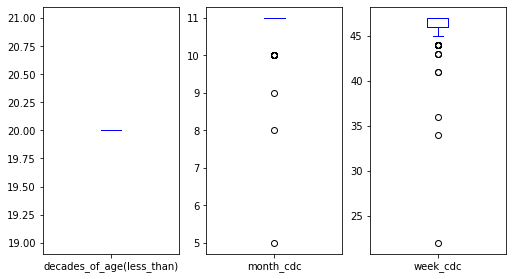

In [36]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='blue');

In [37]:
#death column
df['death_yn'].unique()

array(['No', 'Missing', 'Unknown', 'Yes'], dtype=object)

In [38]:
df['death_yn'].replace({'Missing':np.nan,'Unknown':np.nan},inplace=True)


In [39]:
df['death_yn'].unique()

array(['No', nan, 'Yes'], dtype=object)

# EDA

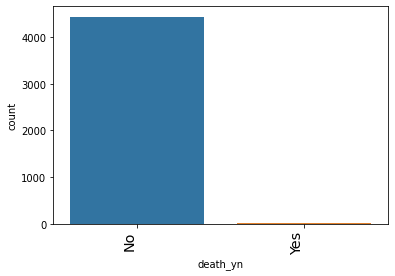

In [40]:
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.countplot(x=df['death_yn'],data=df,orient='h')

**The number of people who died due to covid is significantly very less compared to those who didn't.**

In [41]:
df.groupby(['sex','death_yn'])['death_yn'].count()

sex      death_yn
Female   No          2242
         Yes            4
Male     No          2171
         Yes            2
Missing  No            15
Unknown  No            15
Name: death_yn, dtype: int64

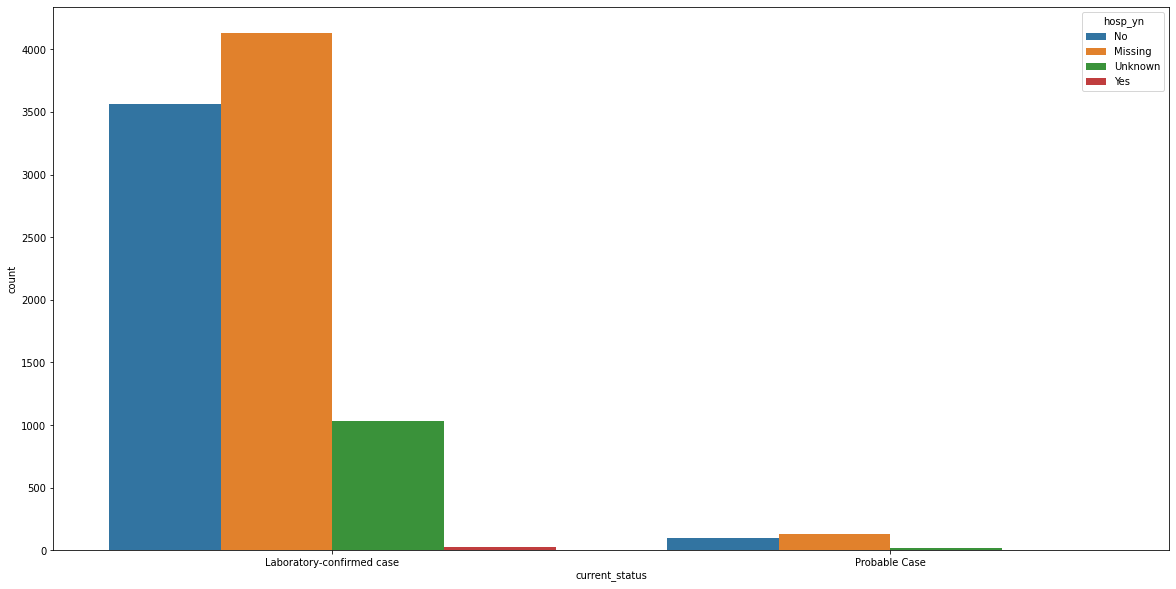

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['current_status'],hue=df['hosp_yn'])
plt.show()

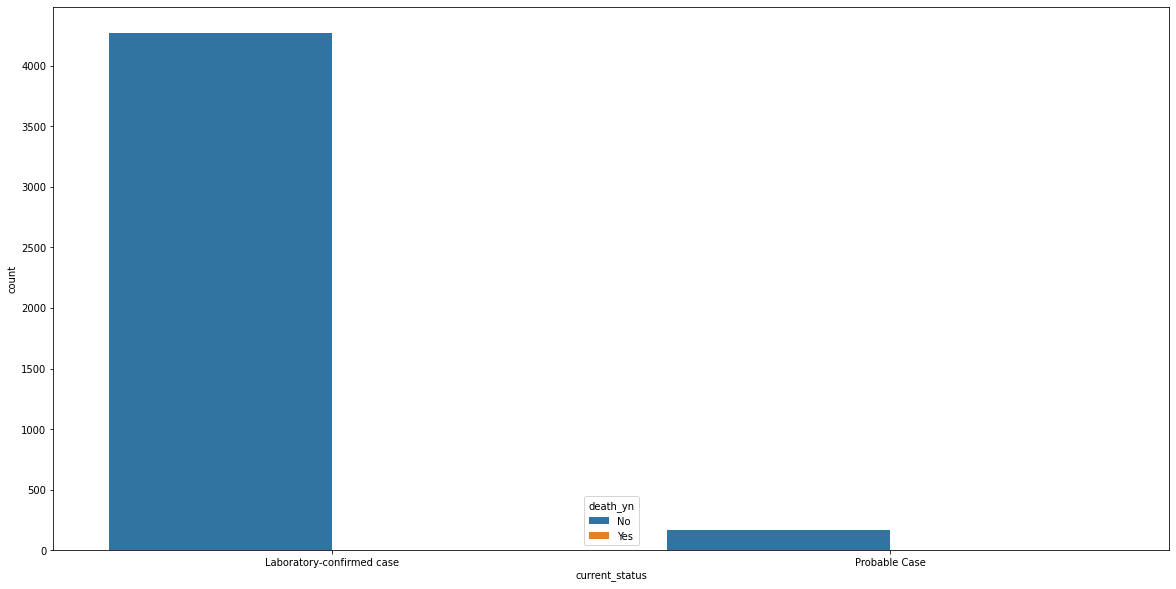

In [43]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['current_status'],hue=df['death_yn'])
plt.show()

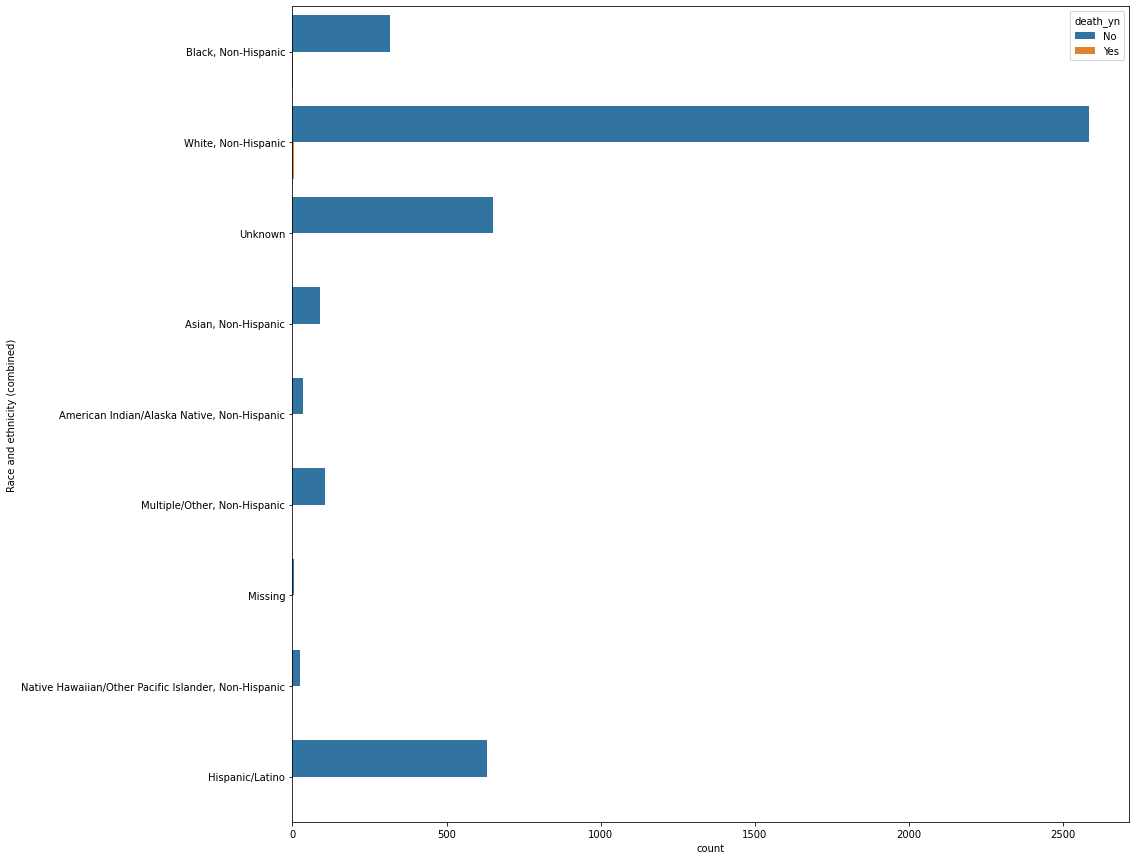

In [44]:
plt.figure(figsize=(15,15))
sns.countplot(y=df['Race and ethnicity (combined)'],hue=df['death_yn'])
plt.show()

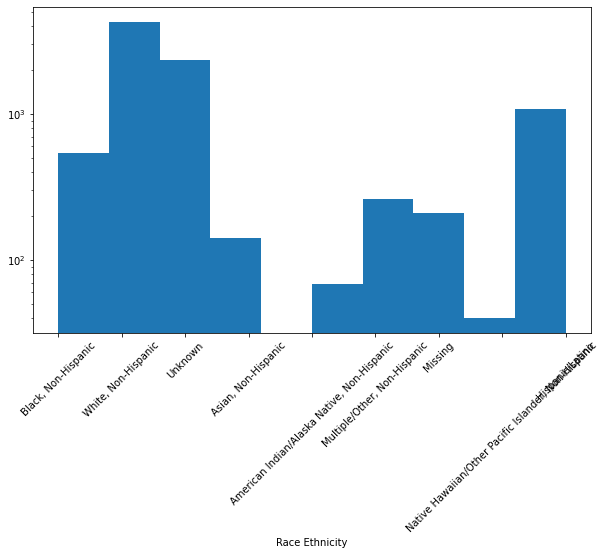

In [45]:
plt.figure(figsize=(10,6))
plt.hist(df['Race and ethnicity (combined)'],log=True)
plt.xlabel("Race Ethnicity")
plt.xticks(rotation=45)
plt.show()

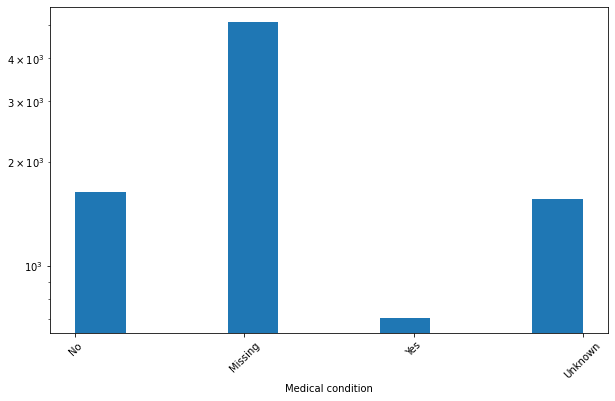

In [46]:
plt.figure(figsize=(10,6))
plt.hist(df['medcond_yn'],log=True)
plt.xlabel("Medical condition")
plt.xticks(rotation=45)
plt.show()


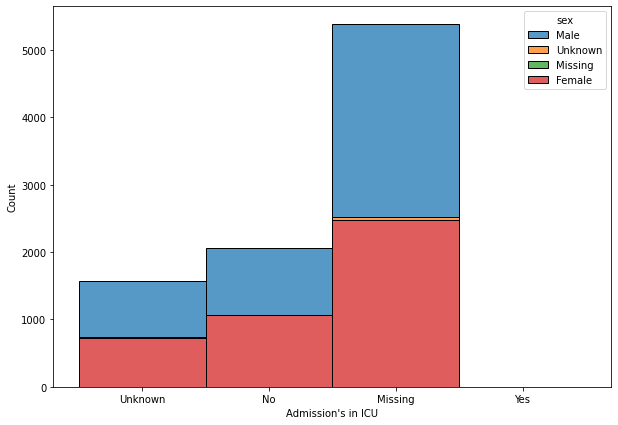

In [47]:
plt.figure(figsize=(10,7))
sns.histplot(data=df, x="icu_yn", hue="sex", multiple="stack")
plt.xlabel("Admission's in ICU")
plt.show()


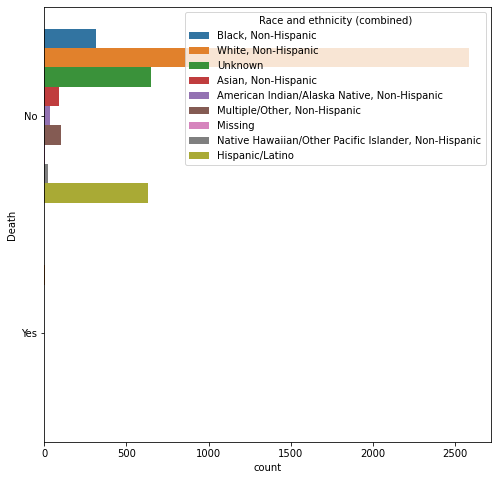

In [48]:
plt.figure(figsize=(8,8))
sns.countplot(y='death_yn',hue='Race and ethnicity (combined)',data=df)
plt.ylabel('Death')
plt.show()

In [49]:
values = df['medcond_yn'].value_counts().tolist()
names = [ 'Unknown', 'Yes', 'No','Missing']
fig = px.pie(names=names,values=values, title="Distribution Pre-Existing Medical Conditions",)
fig.show()


In [50]:
values = df['current_status'].value_counts().tolist()
names = ['Confirmed', 'Probable']
px.pie( names=names,    values=values,title="Case Status Distribution")


In [51]:
values = df['death_yn'].value_counts().tolist()
names = ['Yes', 'No']
fig = px.pie(names=names,values=values, title="Distribution Pre-Existing Medical Conditions",)
fig.show()

In [52]:
df.corr()

,decades_of_age(less_than),month_cdc,week_cdc
decades_of_age(less_than),NaN,NaN,NaN
month_cdc,NaN,1.000000,0.513937
week_cdc,NaN,0.513937,1.000000


<Figure size 720x720 with 0 Axes>

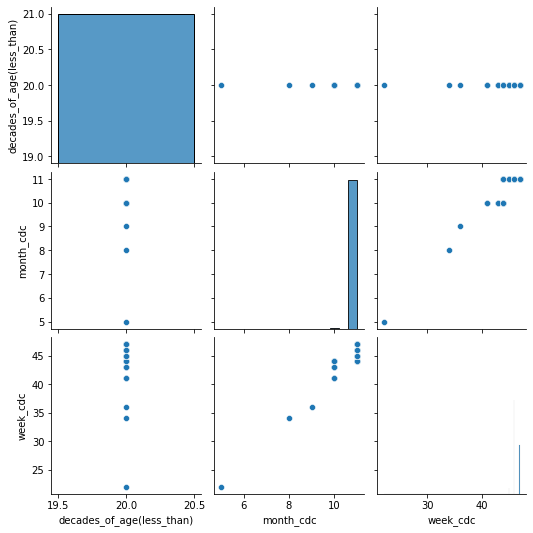

In [53]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

In [54]:
df['cdc_report_dt'].dt.year.max(),df['cdc_report_dt'].dt.year.min()#as the year is same so not considering year column

(2020, 2020)

## **Encoding**

In [55]:
df.current_status.replace({'Laboratory-confirmed case':1,'Probable Case':2},inplace=True)

In [56]:
df.sex.replace({'Male':1,'Female':2,'Other':3},inplace=True)

In [57]:
df.age_group.replace({'10 - 19 Years':1, '20 - 29 Years':2, '30 - 39 Years':2, '40 - 49 Years':3,'50 - 59 Years':3, '0 - 9 Years':1, '60 - 69 Years':4, '80+ Years':4,'70 - 79 Years':4},inplace=True)

In [58]:
df['Race and ethnicity (combined)'].replace({'Black, Non-Hispanic':1, 'White, Non-Hispanic':2,
       'Asian, Non-Hispanic':3,
       'American Indian/Alaska Native, Non-Hispanic':4,
       'Multiple/Other, Non-Hispanic':5,
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic':6,
       'Hispanic/Latino':7},inplace=True)

In [59]:
df['hosp_yn'].replace({'No':0,'Yes':1},inplace=True)

In [60]:
df['icu_yn'].replace({'No':0,'Yes':1},inplace=True)

In [61]:
df['medcond_yn'].replace({'No':0, 'Yes':1},inplace=True)

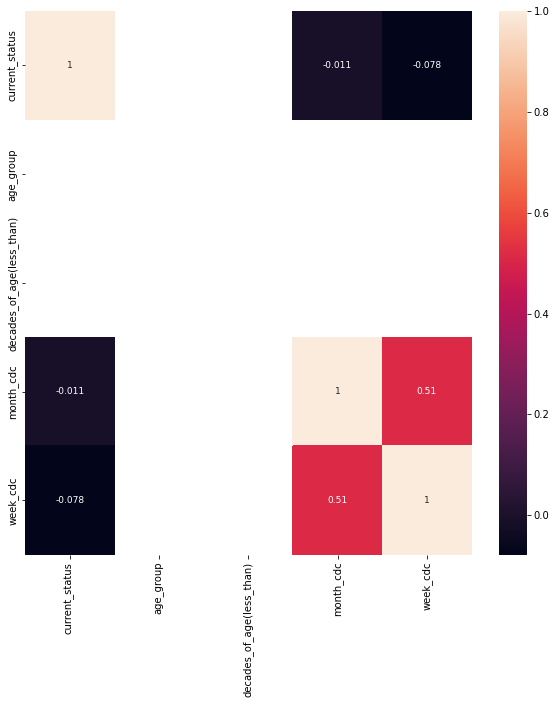

In [62]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':9})

# **Modelling**

### **Performing classification problem based on Death condition**

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9012 entries, 0 to 9011
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   cdc_report_dt                  9012 non-null   datetime64[ns]
 1   current_status                 9012 non-null   int64         
 2   sex                            9012 non-null   object        
 3   age_group                      9012 non-null   int64         
 4   Race and ethnicity (combined)  9012 non-null   object        
 5   hosp_yn                        9012 non-null   object        
 6   icu_yn                         9012 non-null   object        
 7   death_yn                       4449 non-null   object        
 8   medcond_yn                     9012 non-null   object        
 9   symptomatic_yn                 9012 non-null   object        
 10  tested_yn                      9012 non-null   object        
 11  decades_of_age(le

In [64]:
#death column
df['sex'].unique()

array([1, 'Unknown', 'Missing', 2], dtype=object)

In [65]:
df['sex'].replace({'Missing':np.nan,'Unknown':np.nan},inplace=True)


In [66]:
df['sex'].unique()

array([ 1., nan,  2.])

In [67]:
df = df.dropna(subset=['sex'], how='any')
df.reset_index(drop=True, inplace=True)
df.shape

(8951, 14)

In [68]:
df = df.dropna(subset=['death_yn'], how='any')
df.reset_index(drop=True, inplace=True)
df.shape

(4419, 14)

In [69]:
X=df.drop(columns=['Race and ethnicity (combined)',	'hosp_yn',	'icu_yn',	'death_yn',	'medcond_yn','symptomatic_yn','tested_yn','cdc_report_dt'])
y=df['death_yn']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
#Logistic Regression
logistic_reg = LogisticRegression()
pred=logistic_reg.fit(X_train, y_train)
#Predicting values
Y_pred = logistic_reg.predict(X_test)

In [72]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1459

    accuracy                           1.00      1459
   macro avg       1.00      1.00      1.00      1459
weighted avg       1.00      1.00      1.00      1459



In [73]:
confusion_matrix(y_test,Y_pred)

array([[1459]])

In [74]:
#RandomForest

rf_c=RandomForestClassifier()
pred_rf=rf_c.fit(X_train, y_train)
#Predicting values
Y_pred_rf = pred_rf.predict(X_test)

In [75]:
print(classification_report(y_test, Y_pred_rf))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1459

    accuracy                           1.00      1459
   macro avg       1.00      1.00      1.00      1459
weighted avg       1.00      1.00      1.00      1459



In [76]:
#Naive Bayes
Nb=GaussianNB()
pred_nb=Nb.fit(X_train, y_train)
#Predicting values
Y_pred_nb = pred_nb.predict(X_test)

In [77]:
print(classification_report(y_test, Y_pred_nb))


              precision    recall  f1-score   support

          No       1.00      0.72      0.84      1459
         Yes       0.00      0.00      0.00         0

    accuracy                           0.72      1459
   macro avg       0.50      0.36      0.42      1459
weighted avg       1.00      0.72      0.84      1459



In [78]:
#Decision tree classifier
DC= DecisionTreeClassifier()  
pred_dc=DC.fit(X_train, y_train)

In [79]:
Y_pred_dc= pred_dc.predict(X_test)
print(classification_report(y_test, Y_pred_dc))


              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1459

    accuracy                           1.00      1459
   macro avg       1.00      1.00      1.00      1459
weighted avg       1.00      1.00      1.00      1459



**Since the values in death_yn has very less number of yes, the model is overfitting. Hence we shall try the target values as 'month_cdc'**



In [84]:
Y=df['month_cdc']

In [81]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.33, random_state=42)

In [101]:
#Logistic Regression
logistic_reg = LogisticRegression()
pred=logistic_reg.fit(X_train1, y_train1)
#Predicting values
Y_pred = logistic_reg.predict(X_test1)

In [102]:
print(classification_report(y_test1, Y_pred))

              precision    recall  f1-score   support

         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         1
        10.0       1.00      1.00      1.00         2
        11.0       1.00      1.00      1.00      1456

    accuracy                           1.00      1459
   macro avg       0.50      0.50      0.50      1459
weighted avg       1.00      1.00      1.00      1459



In [103]:
#RandomForest

rf_c=RandomForestClassifier()
pred_rf=rf_c.fit(X_train1, y_train1)
#Predicting values
Y_pred_rf1 = pred_rf.predict(X_test1)

In [104]:
print(classification_report(y_test1, Y_pred_rf1))

              precision    recall  f1-score   support

         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         1
        10.0       1.00      1.00      1.00         2
        11.0       1.00      1.00      1.00      1456

    accuracy                           1.00      1459
   macro avg       0.50      0.50      0.50      1459
weighted avg       1.00      1.00      1.00      1459



In [105]:
#Naive Bayes
Nb=GaussianNB()
pred_nb=Nb.fit(X_train1, y_train1)
#Predicting values
Y_pred_nb1 = pred_nb.predict(X_test1)

In [106]:
print(classification_report(y_test1, Y_pred_nb1))

              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         1
        10.0       0.67      1.00      0.80         2
        11.0       1.00      1.00      1.00      1456

    accuracy                           1.00      1459
   macro avg       0.56      0.67      0.60      1459
weighted avg       1.00      1.00      1.00      1459



In [107]:
#Decision tree classifier
DC= DecisionTreeClassifier()  
pred_dc1=DC.fit(X_train1, y_train1)

In [108]:
Y_pred_dc1= pred_dc1.predict(X_test1)

In [109]:
print(classification_report(y_test1, Y_pred_dc1))

              precision    recall  f1-score   support

         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         1
        10.0       1.00      1.00      1.00         2
        11.0       1.00      1.00      1.00      1456

    accuracy                           1.00      1459
   macro avg       0.50      0.50      0.50      1459
weighted avg       1.00      1.00      1.00      1459



Since the dataset is live and keeps changing everytime we try to load, the best model keeps changing. But an overall pattern has logistic regression as the best model, hence we can tune this model furthur.

In [100]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train1,y_train1)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.9996621621621621


Logistic regression can get an 'accuracy' of '0.99' with the 'C' values as 10 and 'penalty' as 'l2'